# Magnus

In [3]:
# librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Parámetros físicos

In [4]:
m = 0.450   # masa (kg)
r = 0.115   # radio (m)
A = np.pi * r**2    # area transversal (m^2)
rho = 1.3   # densidad del aire (kg/m^3)
g = 9.81    # gravedad (m/s^2)
CD = 0.5    # coeficiente de arrastre
CM = 0.2    # coeficiente de Magnus

Velocidad inicial y rotación

In [5]:
# velocidad inicial (m/s) en [x, y, z]
velocidades_iniciales = [
    np.array([0, 30, 40]),   # Caso original
    np.array([0, 35, 45]),   # Velocidad ligeramente mayor
    np.array([0, 25, 35])    # Velocidad menor
]

omega = np.array([0, 0, -600])   # velocidad angular (rad/s) en [x, y, z]

Tiempos

In [6]:
# segundos
dt = 0.001
t_max = 10 
t = np.arange(0, t_max + dt, dt)  # array
n_steps = len(t)

Condiciones iniciales

In [7]:
#pos = np.zeros((3, n_steps))   # posicion (x, y, z)
#vel = np.zeros((3, n_steps))   # velocidad (x, y, z)

#pos[:, 0] = np.array([0, 0, 0])  # posicion inicial (m)
#vel[:, 0] = v0                  # velocidad inicial (m/s)


Fuerza de Magnus

In [8]:
# fuerza de magnus
def magnus_force(v, omega):
    cross_prod = np.cross(v, omega)
    norm_cross = np.linalg.norm(cross_prod)
    if norm_cross == 0:
        return np.zeros(3)
    return CM * rho * A * np.linalg.norm(v)**2 * (cross_prod / norm_cross)


Método de Euler

In [9]:
def simular_trayectoria(v0):
    pos = np.zeros((3, n_steps))
    vel = np.zeros((3, n_steps))
    pos[:, 0] = [0, 0, 0]
    vel[:, 0] = v0

    for i in range(n_steps - 1):
        v = vel[:, i]
        Fg = np.array([0, 0, -m * g])   # gravedad
        Fr = -0.5 * rho * CD * A * np.linalg.norm(v) * v    # resistencia del aire
        FM = magnus_force(v, omega)         # magnus

        # aceleración total
        accel = (Fg + Fr + FM) / m

        # Euler
        vel[:, i + 1] = v + accel * dt
        pos[:, i + 1] = pos[:, i] + v * dt

        # detener si toca el suelo
        if pos[2, i + 1] < 0:
            return pos[:, :i + 2], vel[:, :i + 2], t[:i + 2]
    return pos, vel, t

In [10]:
# por velocidad
trayectorias = [simular_trayectoria(v0) for v0 in velocidades_iniciales]
colores = ['r', 'g', 'b']
labels = ['v0 = [0, 30, 40] m/s', 'v0 = [0, 35, 45] m/s', 'v0 = [0, 25, 35] m/s']


Gráficas

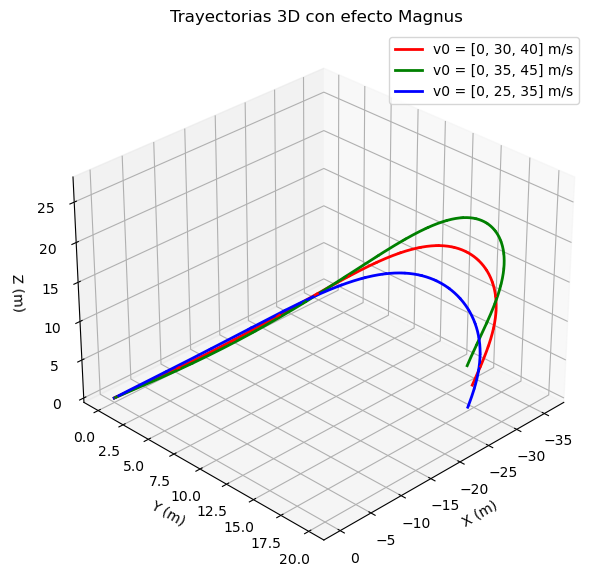

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for (pos, vel, tiempo), color, label in zip(trayectorias, colores, labels):
    ax.plot(pos[0], pos[1], pos[2], color=color, label=label, linewidth=2)
    
    # flechas
    skip = max(1, len(pos[0]) // 20)  # espaciado
    ax.quiver(pos[0][::skip], pos[1][::skip], pos[2][::skip],
              vel[0][::skip], vel[1][::skip], vel[2][::skip],
              color=color, length=0.5, normalize=True, arrow_length_ratio=0.3)


ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Trayectorias 3D con efecto Magnus')
ax.legend()
ax.grid(True)
ax.view_init(elev=30, azim=45)  # vista en ángulo
plt.show()

Gráficas 2D de posiciones en función del tiempo

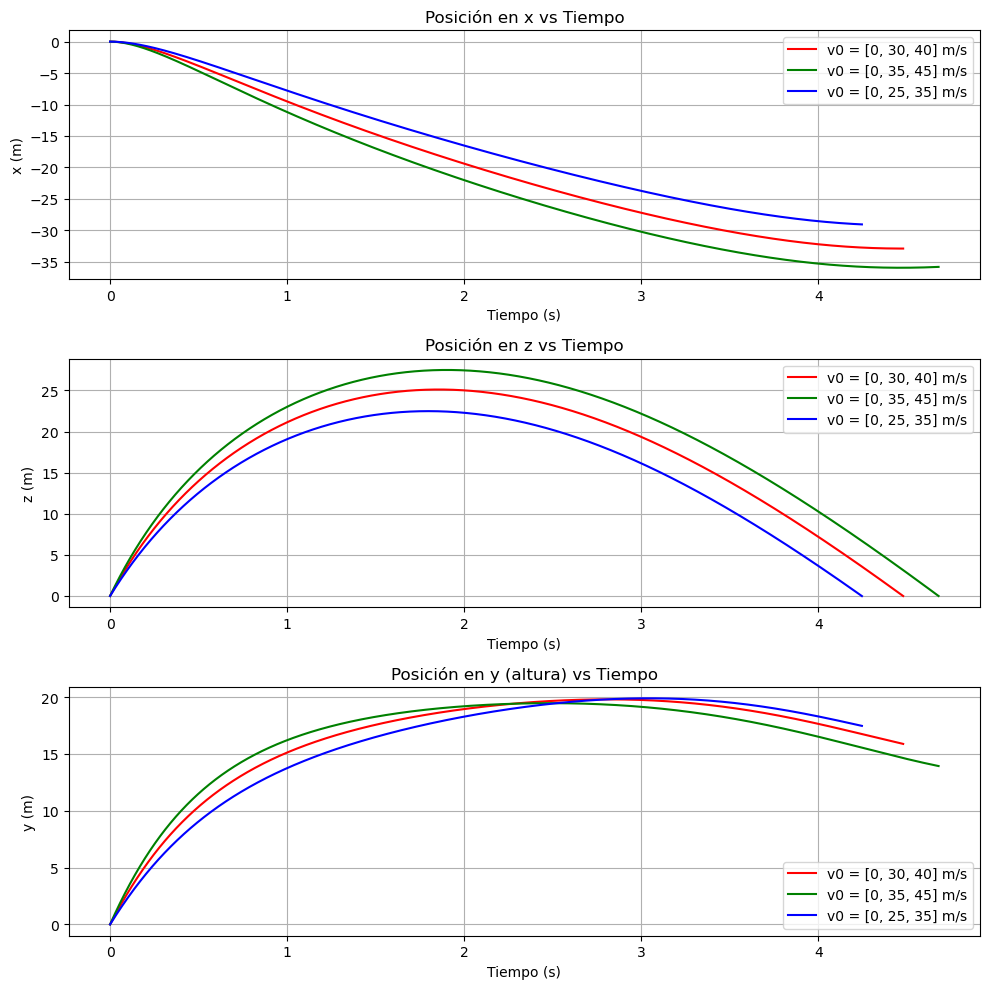

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

for (pos, vel, tiempo), color, label in zip(trayectorias, colores, labels):
    # x vs tiempo
    axs[0].plot(tiempo, pos[0, :], color=color, linewidth=1.5, label=label)
    axs[0].set_xlabel('Tiempo (s)')
    axs[0].set_ylabel('x (m)')
    axs[0].set_title('Posición en x vs Tiempo')
    axs[0].grid(True)

    # z vs tiempo
    axs[1].plot(tiempo, pos[2, :], color=color, linewidth=1.5, label=label)
    axs[1].set_xlabel('Tiempo (s)')
    axs[1].set_ylabel('z (m)')
    axs[1].set_title('Posición en z vs Tiempo')
    axs[1].grid(True)

    # y vs tiempo
    axs[2].plot(tiempo, pos[1, :], color=color, linewidth=1.5, label=label)
    axs[2].set_xlabel('Tiempo (s)')
    axs[2].set_ylabel('y (m)')
    axs[2].set_title('Posición en y (altura) vs Tiempo')
    axs[2].grid(True)

# Leyendas
for ax in axs:
    ax.legend()

plt.tight_layout()
plt.show()